In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import numpy as np

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV)
from sklearn.metrics import (mean_absolute_error,
                             make_scorer)
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures,
                                   MinMaxScaler)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb


from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [4]:
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [6]:
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [8]:
df_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [10]:
df_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: rougher.output.recovery, Length: 14579, dtype: float64

In [11]:
test_ttest = df_test.copy()
train_ttest = df_train.copy()

In [12]:
def recovery_calculate(C,F,T):
    return (C * (F-T)) / (F * (C-T)) * 100

In [13]:
recovery_rougher_au = recovery_calculate(df_train['rougher.output.concentrate_au'],df_train['rougher.input.feed_au'],df_train['rougher.output.tail_au'])

In [14]:
mean_absolute_error(recovery_rougher_au,df_train['rougher.output.recovery'])

9.83758577644259e-15

- Есть совсем незначительные различия, расчет находящийся в данных абсолютно верный.

In [15]:
recovery_rougher_au.describe()

count    14579.000000
mean        82.521200
std         15.797521
min         -0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
dtype: float64

In [16]:
df_train['rougher.output.recovery'].describe()

count    14579.000000
mean        82.521200
std         15.797521
min          0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [17]:
set(df_train.columns).difference(set(df_test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

- Как мы можем заметить почти все недостающие признаки - это данные "на выходе", вероятнее всего они не включены в тестовую выборку т.к.модель должна будет работать не имея доступа к этим данным.

In [18]:
df_test.duplicated().sum()

0

In [19]:
df_train.duplicated().sum()

0

### Вывод по первой части


- С расчетами все четко, нет никаких проблем.


- в df_test не хватает столбцов с результатами этапов


- Дубликатов не обнаружено, но есть пропуски в данных их не много, но перед тем как что то делать с ними сначало нужно определиться со столбцами которые мы оставляем.


- Обнаружены и удалены аномалии в виде нулевых значений 

### Изменение концентрации металлов Au, Ag, Pb на разных стадиях

In [20]:
sns.set(style="darkgrid")

In [21]:
def concentrate_level(feature):
    ax = sns.histplot(feature)
    ax.set(xlabel='Уровень концентрации',
           ylabel='Количество наблюдений',
           title = feature.name)
    return plt.show()

In [22]:
df_full = df_full.loc[~(df_full==0).any(axis=1)]
df_train = df_train.loc[~(df_train==0).any(axis=1)]

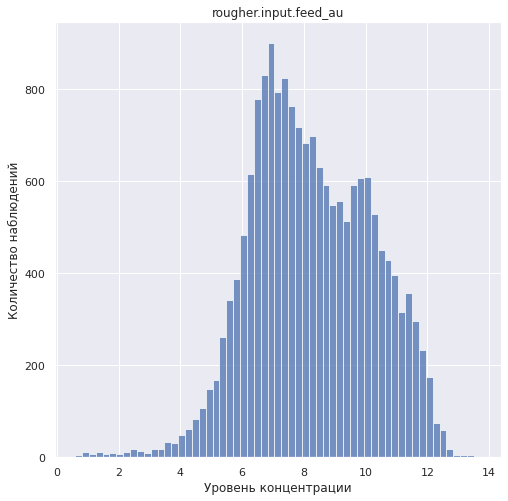

,rougher.input.feed_au
count,17894.000000
mean,8.234411
std,1.953386
min,0.588152
25%,6.814526
50%,8.086987
75%,9.761780
max,13.731330


In [23]:
# Au feed
concentrate_level(df_full['rougher.input.feed_au'])
df_full['rougher.input.feed_au'].describe().to_frame()

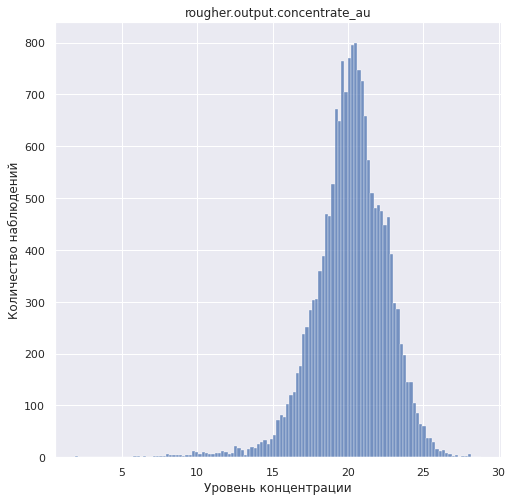

,rougher.output.concentrate_au
count,17894.000000
mean,20.189525
std,2.426891
min,1.889855
25%,18.919549
50%,20.314645
75%,21.744052
max,28.824507


In [24]:
# Au rougher
concentrate_level(df_full['rougher.output.concentrate_au']);
df_full['rougher.output.concentrate_au'].describe().to_frame()

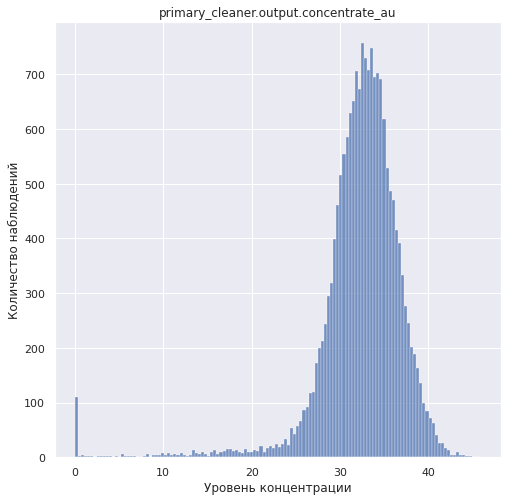

,primary_cleaner.output.concentrate_au
count,17894.000000
mean,32.314885
std,5.039989
min,0.010000
25%,30.504685
50%,32.837665
75%,35.062395
max,45.933934


In [25]:
# Au primary_cleaner
concentrate_level(df_full['primary_cleaner.output.concentrate_au'])

df_full['primary_cleaner.output.concentrate_au'].describe().to_frame()

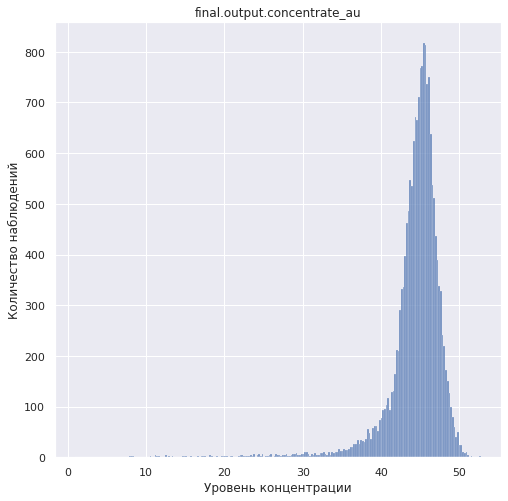

,final.output.concentrate_au
count,17894.000000
mean,44.315725
std,3.893130
min,0.904254
25%,43.417530
50%,45.009343
75%,46.256785
max,52.756638


In [26]:
# Au final
concentrate_level(df_full['final.output.concentrate_au']);
df_full['final.output.concentrate_au'].describe().to_frame()

- Au распределения скошены влево, после этапа флотации начинают появляться нулевые значения, которых становится меньше с каждым последующим этапом.


- С каждым этапом концентрацию Au получается увеличить приблизительно на 12 пунктов.

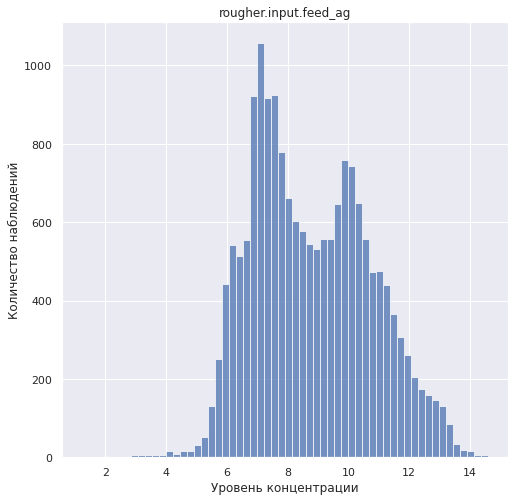

,rougher.input.feed_ag
count,17894.000000
mean,8.778702
std,1.939712
min,1.226494
25%,7.194143
50%,8.559773
75%,10.226176
max,14.596026


In [27]:
# Ag feed
concentrate_level(df_full['rougher.input.feed_ag']);
df_full['rougher.input.feed_ag'].describe().to_frame()

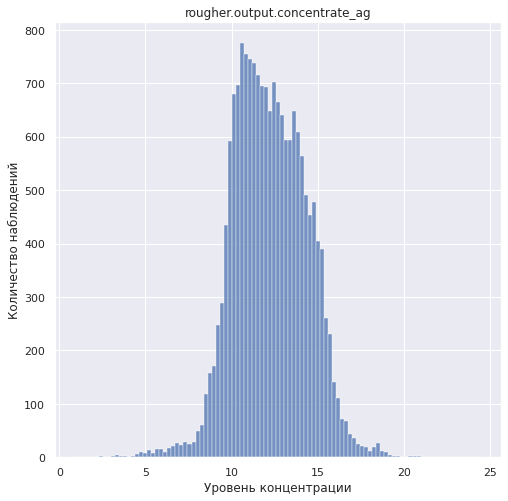

,rougher.output.concentrate_ag
count,17894.000000
mean,12.228543
std,2.126280
min,0.905993
25%,10.690066
50%,12.129965
75%,13.759971
max,24.480271


In [28]:
# Ag rougher
concentrate_level(df_full['rougher.output.concentrate_ag']);
df_full['rougher.output.concentrate_ag'].describe().to_frame()

,primary_cleaner.output.concentrate_ag
count,17894.000000
mean,8.501985
std,1.960038
min,0.010000
25%,7.271632
50%,8.525590
75%,9.835970
max,16.081632


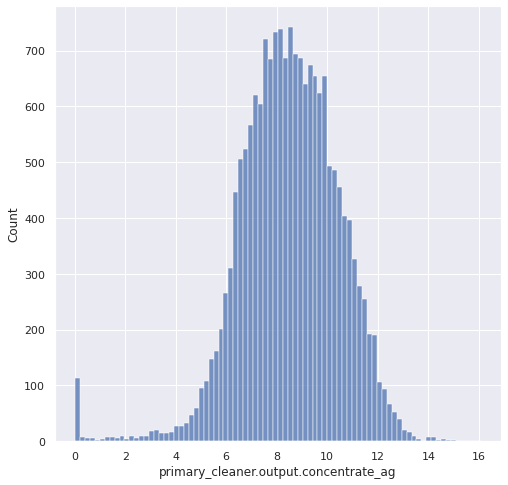

In [29]:
# Ag primary_cleaner
sns.histplot(df_full['primary_cleaner.output.concentrate_ag']);
df_full['primary_cleaner.output.concentrate_ag'].describe().to_frame()

,final.output.concentrate_ag
count,17893.000000
mean,5.186507
std,1.327959
min,0.434375
25%,4.253116
50%,5.051731
75%,5.873798
max,16.001945


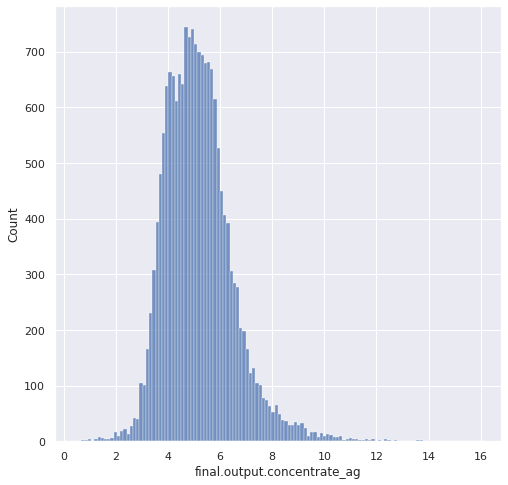

In [30]:
# Ag final
sns.histplot(df_full['final.output.concentrate_ag']);
df_full['final.output.concentrate_ag'].describe().to_frame()

- Не все так же однозначно. Наблюдаем увелечение концентрации серебра после этапа флотации (прикладываю сноску из статьи)

**После обогащения золота методом флотации концентрация серебра может увеличиваться из-за того, что этот метод основан на разделении минералов по их гидрофобности. В процессе флотации использование реагента, называемого коллектором, позволяет привязывать гидрофобные минералы к пузырькам воздуха, которые поднимаются на поверхность смеси. Серебро часто является гидрофобным минералом и может быть привязано к пузырькам воздуха вместе с золотом. При этом, если серебро содержится в исходной руде в низкой концентрации, то после флотации его концентрация может увеличиться за счет разделения на более чистые фракции.**

- Далее концентрация серебра начинает падать.


- Так же мы можем отметить появление нулевых значений после этапа флотации.

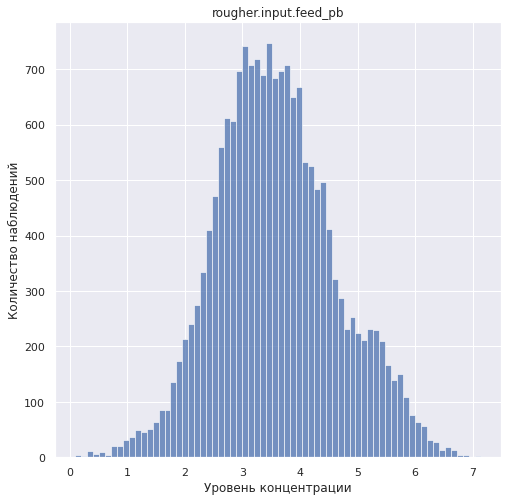

count    17795.000000
mean         3.586912
std          1.047527
min          0.088552
25%          2.868368
50%          3.516071
75%          4.241858
max          7.142594
Name: rougher.input.feed_pb, dtype: float64

In [31]:
# Pb feed
concentrate_level(df_full['rougher.input.feed_pb']);
df_full['rougher.input.feed_pb'].describe()

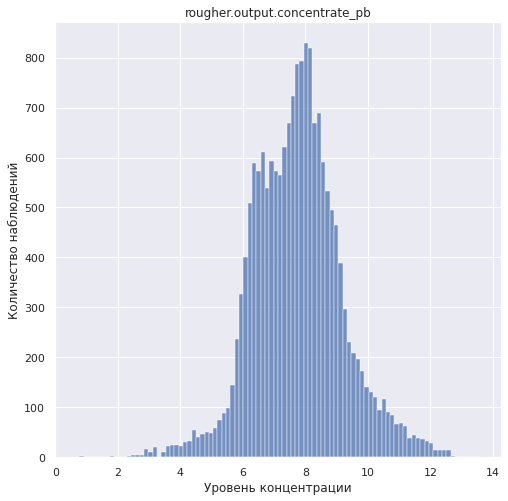

count    17894.000000
mean         7.757830
std          1.430778
min          0.629964
25%          6.773289
50%          7.761659
75%          8.589174
max         13.617072
Name: rougher.output.concentrate_pb, dtype: float64

In [32]:
# Pb rougher
concentrate_level(df_full['rougher.output.concentrate_pb']);
df_full['rougher.output.concentrate_pb'].describe()

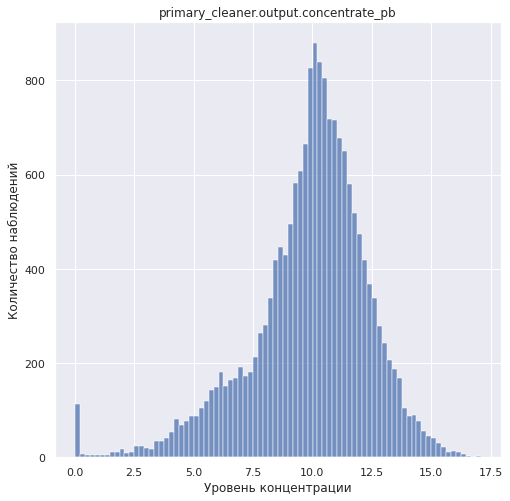

count    17810.000000
mean         9.890319
std          2.466532
min          0.010000
25%          8.712777
50%         10.184256
75%         11.439949
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64

In [33]:
# Pb primary_cleaner
concentrate_level(df_full['primary_cleaner.output.concentrate_pb']);
df_full['primary_cleaner.output.concentrate_pb'].describe()

In [34]:
df_full.groupby('primary_cleaner.output.concentrate_pb').count()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
primary_cleaner.output.concentrate_pb,,,,,,,,,,,,,,,,,,,,,
0.010000,109,109,109,77,109,109,109,109,109,109,...,78,109,109,109,109,109,109,109,77,109
0.021357,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.045857,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.135342,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.214927,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.360361,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16.519896,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16.660398,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


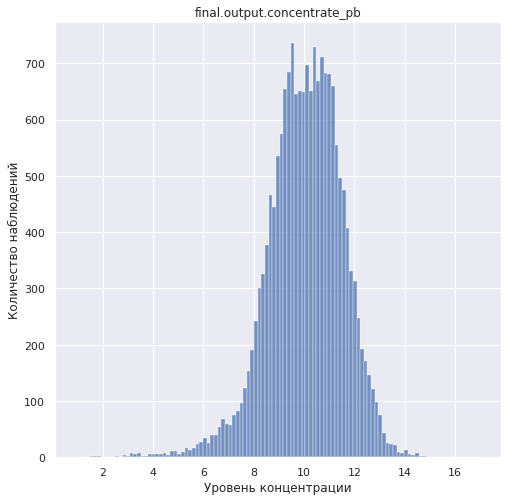

count    17893.000000
mean        10.049647
std          1.497612
min          0.893524
25%          9.155810
50%         10.120284
75%         11.069740
max         17.031899
Name: final.output.concentrate_pb, dtype: float64

In [35]:
# Pb final
concentrate_level(df_full['final.output.concentrate_pb']);
df_full['final.output.concentrate_pb'].describe()

- Содержание свинца увеличивается вдвое после флотации и приблизительно на 1 пункт на каждом следующем этапе.

### Разница в размерах гранул сырья в тестовой и обучающей выборках

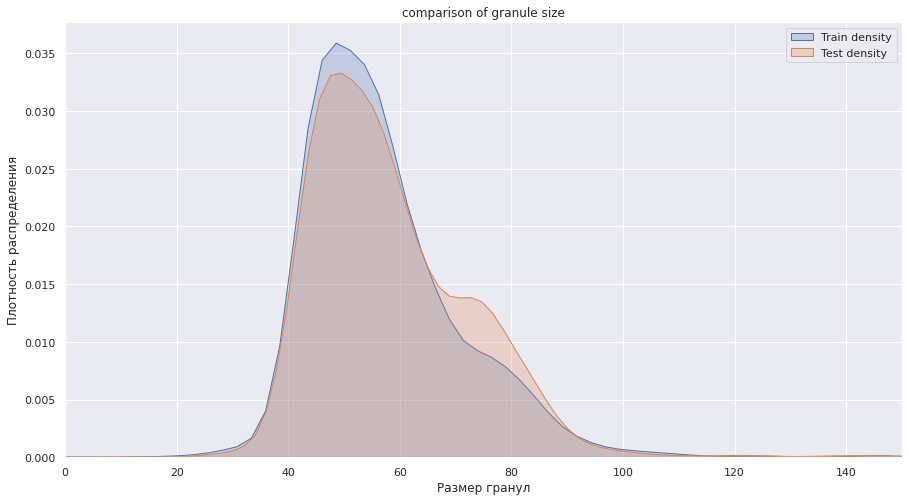

In [37]:
fig, ax_kde = plt.subplots(figsize=(15,8))

sns.kdeplot(x='rougher.input.feed_size',
            data = df_train, shade=True,
            label='Train density', ax = ax_kde)
sns.kdeplot(x='rougher.input.feed_size',
            data = df_test, shade=True,
            label='Test density',ax = ax_kde)
ax_kde.set(xlabel='Размер гранул',
           ylabel='Плотность распределения',
           xlim = (0,150),
           title = 'comparison of granule size')
plt.legend();

In [ ]:
def hist_box(df):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))
    sns.boxplot(x='rougher.input.feed_size', data=df, ax=ax1)
    sns.histplot(x='rougher.input.feed_size', data=df, stat='density', ax=ax2)
    ax1.set(xlabel='Размер гранул',
            ylabel='Плотность распределения',
            xlim = (0,150),
            title = 'Boxplot of granule size')
    ax2.set(xlabel='Размер гранул',
            ylabel='Плотность распределения',
            xlim = (0,150),
            title = 'Hist of granule size')
    return plt.show()

In [ ]:
hist_box(df_test)

In [ ]:
df_test['rougher.input.feed_size'].describe()

In [ ]:
hist_box(df_train)

In [ ]:
df_train['rougher.input.feed_size'].describe()

In [ ]:
df_train.dropna()['rougher.input.feed_size']

In [ ]:
df_test.dropna()['rougher.input.feed_size']

**Вывод основанный на графиках**
- Размер приблизительно одинаковый, практически все значения в обоих случаях лежат в диапазоне 20 - 90


- На тренировочной выборке значения выбросов доходят до 500, а на тестовой до 350

- Сделаем ttest для того что бы убедиться в том что в обеих выборках размер гранул подобный

**H0 - Размер гранул равный в обеих выборках**


**H1 - Размер гранул отличается**

In [ ]:
stats.ttest_ind(test_ttest['rougher.input.feed_size'].dropna(),
                train_ttest['rougher.input.feed_size'].dropna())

    p-value = 0.5962211913942836    t-statistic = 0.5298512133936326
-  У нас нет оснований отколонить нулевую гипотезу, далее будем работать предпологая равенство гранул между выборками

In [ ]:
stage_concentrate = pd.DataFrame()

In [ ]:
stage_concentrate['feed'] = df_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
stage_concentrate['rougher'] = df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
stage_concentrate['primary'] = df_full[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
stage_concentrate['final'] = df_full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

In [ ]:
stage_concentrate.describe()

In [ ]:
stage_concentrate

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.histplot(stage_concentrate['feed'], ax=axs[0, 0])
sns.histplot(stage_concentrate['rougher'], ax=axs[0, 1])
sns.histplot(stage_concentrate['primary'] , ax=axs[1, 0])
sns.histplot(stage_concentrate['final'] , ax=axs[1, 1])
axs[0, 0].set_title("Feed")
axs[0, 1].set_title("Rougher")
axs[1, 0].set_title("Primary")
axs[1, 1].set_title("Final")
for ax in axs.flat:
    ax.set(xlabel='Total concentrate')

- Можно отметить то что с каждой обработкой колокол становиться все уже, то есть разброс данных становится кучнее.

### Вывод
#### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах.

- Au(золото) - распределения скошены влево, после этапа флотации начинают появляться нулевые значения, которых становится меньше с каждым последующим этапом. С каждым этапом концентрацию Au получается увеличить приблизительно на 12 пунктов.


- Ag(серебро) - Концентрация серебра возрастает после этапа флотации, а затем начинает уменьшаться.


- Pb(свинец) - Содержание увеличивается вдвое после флотации и приблизительно на 1 пункт на каждом следующем этапе.


#### Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках.


- Значемых различий нет, на первый взгляд может броситься в глаза только то что в тренировочной выборке присутствуют более глубокие выбросы.


- Почти все значения размера лежат в диапазоне от 20-90

#### Исследуйте суммарную концентрацию металлов на разных стадиях.


- Сумма концентрации элементов вырастает на выходе


- Дисперсия становиться меньше.

## Модель

In [ ]:
RS = 42

In [ ]:
def sMAPE(y_true, y_pred):
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.values
    r_pred, r_true, f_pred, f_true = y_pred[:,0:1], y_true[:,0:1], y_pred[:,1:2], y_true[:,1:2]
    smape_r = 2 * np.abs(r_pred - r_true) / (np.abs(r_pred) + np.abs(r_true))
    r = np.mean(smape_r)*100
    smape_f = 2 * np.abs(f_pred - f_true) / (np.abs(f_pred) + np.abs(f_true))
    f = np.mean(smape_f)*100
    return 1/4 * r + 3/4 * f

In [ ]:
df_train.drop(columns = ['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol'], inplace = True)

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
test_before = len(df_test)
df_test.fillna(df_test.median(),inplace=True)
len(df_test)/test_before

In [ ]:
train_before = len(df_train)
df_train.fillna(df_test.median(),inplace=True)
len(df_train)/train_before

- Удалим столбцы которых нет в тесте


- Нужно что то делать с пропусками, после недолгих раздумий ввиду того что пропусков не так много мною было принято тяжелое решение просто удалить все строки с пропусками, 7% и 8% данных не самое страшное что можно себе представить. Вы спросите меня можно ли было попытаться восстановить пропущенные значения? Ну чего уже гадать что сделано то сделано.

In [ ]:
df_full[['final.output.recovery','rougher.output.recovery']].isna().sum()

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_full['date'] = pd.to_datetime(df_full['date'])

In [ ]:
df_test_dates = df_test[['date']]
y_test = pd.merge(df_test_dates, df_full, on='date', how='inner')[['date','rougher.output.recovery', 'final.output.recovery']]
y_test.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [ ]:
y_test.isna().sum()

In [ ]:
df_test = df_test[df_test['date'].isin(y_test['date'])]

In [ ]:
y_test.drop('date',axis=1,inplace=True)

In [ ]:
y_test.head()

In [ ]:
df_train['date'] = df_train['date'].apply(lambda x: x.timestamp())
df_test['date'] = df_test['date'].apply(lambda x: x.timestamp())

In [ ]:
X_train = df_train.drop(columns = ['date','rougher.output.recovery','final.output.recovery'])
y_train = df_train[['rougher.output.recovery','final.output.recovery']]

X_test = df_test.drop('date',axis=1)

In [ ]:
X_train = X_train.values.reshape(-1, X_train.shape[1])
X_test = X_test.values.reshape(-1, X_test.shape[1])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
smape = make_scorer(sMAPE, greater_is_better=False)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring=smape)
print("Средняя точность модели:", -scores_knn.mean())

In [ ]:
tree = DecisionTreeRegressor(random_state = RS)
param_tree = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv=5,scoring=smape)
grid_tree.fit(X_train, y_train)
print("Наилучшие параметры:", grid_tree.best_params_)
print("Наилучшее значение метрики:", -grid_tree.best_score_)

In [ ]:
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring=smape)
print("Средняя точность модели:", -scores_lr.mean())

In [ ]:
ridge = Ridge(random_state = RS)
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring=smape)
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

In [ ]:
ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_train, y_train)

In [ ]:
ridge_pred = ridge.predict(X_test)
ridge_smape = sMAPE(y_test, ridge_pred)

### Лучшая модель

- Лучшую метрику smape показала линейная регрессия с применением регуляризации ridge

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_pred = dummy_regr.predict(X_test)
dummy_result = sMAPE(y_test,dummy_pred)

print(f'dummy = {dummy_result}, result = {ridge_smape}')
if dummy_result < ridge_smape: print('Предсказание среднего лучше')
else: print('Модель адекватна')

### Вывод

- Написана функция для расчета метрики взвешенного sMAPE


- Протестировано 3 модели - метод ближайших соседей, дерево решений и линейная регрессия, лучшее результат был получен с помощью линейной регрессии, далее было принято попробовать добавить штраф к сумме квадратов коэффициентов регрессии и было получено небольшое улучшение метрики.


- Наилучшей моделью оказалась линейная регрессия с регуляризацией Ridge.


- smape = 7 означает что в среднем значение которое предсказывает наша модель отличается от фактического приблизительно на 7 процентов.


- Проведена проверка на адекватность, которая показала что модель способна прдесказывать таргет лучше чем константные значения.